Linear Regression:
1. closed metod 
2. gradient descent 

1. closed metod

a. using matrix multiplication, a manual form 
b. using scikit learn 

[[1.93236523]
 [0.22375131]
 [0.93348526]
 [1.93501648]
 [1.43728549]
 [1.65440788]
 [0.80098901]
 [1.33943088]
 [1.40483874]
 [1.47103656]
 [0.74025933]
 [1.90732132]
 [1.98264833]
 [1.88346667]
 [1.69207867]
 [1.22521377]
 [0.27167685]
 [1.75442117]
 [1.14390358]
 [0.56801482]
 [0.77805255]
 [0.05372609]
 [1.8198914 ]
 [1.06858367]
 [1.33065512]
 [1.05596255]
 [1.64163862]
 [0.41951611]
 [0.12232144]
 [0.85365347]
 [1.4618049 ]
 [0.08517717]
 [0.0726411 ]
 [1.39975442]
 [1.50934424]
 [0.19873372]
 [0.16494357]
 [1.28603811]
 [1.88865291]
 [0.21298571]
 [0.03523403]
 [0.64464221]
 [1.15217069]
 [0.30387613]
 [1.31134879]
 [1.87473492]
 [0.90883518]
 [1.09776884]
 [0.94577481]
 [1.29186884]
 [0.38112444]
 [1.07389202]
 [1.80870136]
 [1.58482378]
 [1.38264621]
 [1.14408051]
 [1.15492227]
 [0.24234306]
 [0.24195056]
 [0.10567365]
 [0.62698803]
 [0.99617727]
 [0.85800417]
 [0.16503525]
 [1.17742763]
 [0.65027845]
 [1.73900167]
 [0.19447701]
 [0.74990589]
 [0.68717965]
 [1.88175266]
 [1.69

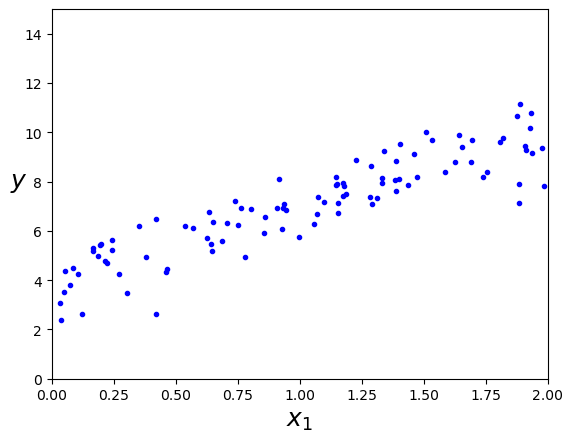

In [20]:
#skapa fiktiv datamängd 

import numpy as np 
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

print(X)
print(y)

# plotta datamängden
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()# lets 


In [6]:
#compute betas useing normal equation

X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #inv computes the inverse of a matrix, and the dot method performs matrix multiplication



In [8]:
theta_best # the equation found this instead of y = 4 + 3x1 + Gaussian noise

# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close
# enough, but the noise made it impossible to recover the exact parameters of the origi‐
# nal function.




array([[4.27353435],
       [2.77723571]])

In [12]:
# make predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
print (X_new_b)
print(X_new)

[[1. 0.]
 [1. 2.]]
[[0]
 [2]]


In [13]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.27353435],
       [9.82800576]])

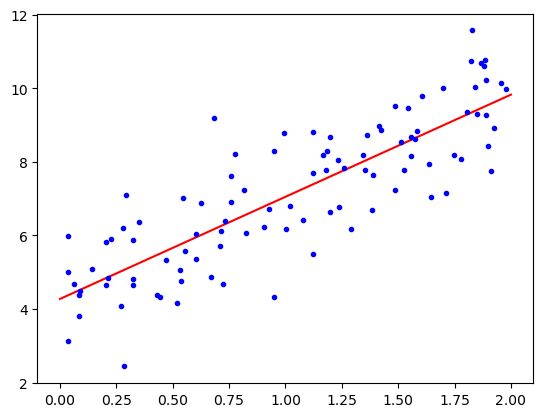

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

## B. Sklearn 

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94120416]), array([[3.02791196]]))

In [23]:
lin_reg.predict(X_new)

array([[3.94120416],
       [9.99702808]])

array([[6.77670444],
       [0.21206505]])

## Gradient Descent 


## Polynomials 


In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y= 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

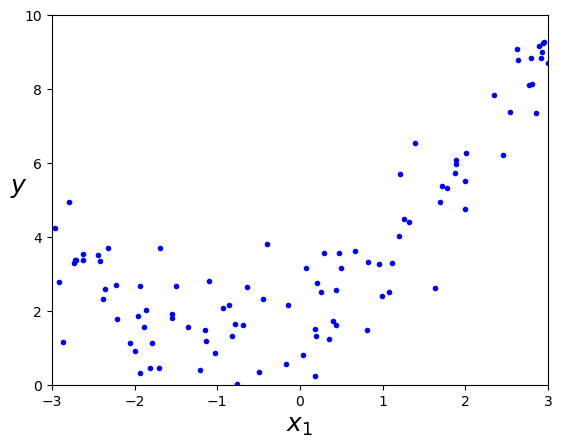

In [44]:


plt.plot(X,y,"b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show() 

#clearly not a linear model, so let's use a polynomial model


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree sets the degree of the polynomial, meaning we want to add the square of each feature in the training set as a new feature
X_poly  = poly_features.fit_transform(X) # all this does is square the features. 
X[0]
# print(X)

X_poly[0]

array([-1.54412291,  2.38431557])

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89028692]), array([[0.94857478, 0.51023533]]))

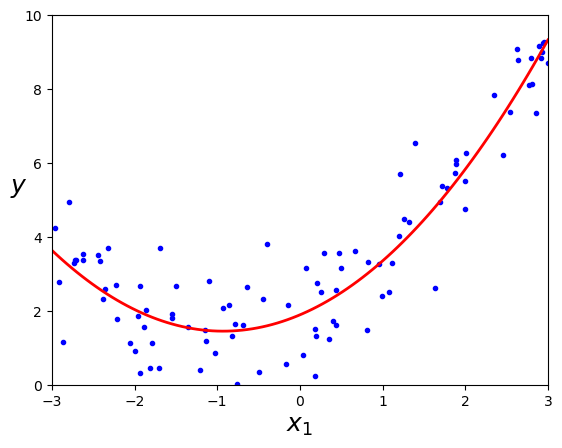

In [46]:
X_new= np.linspace(-3,3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)




plt.plot(X,y,"b.")

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])

plt.show() 


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

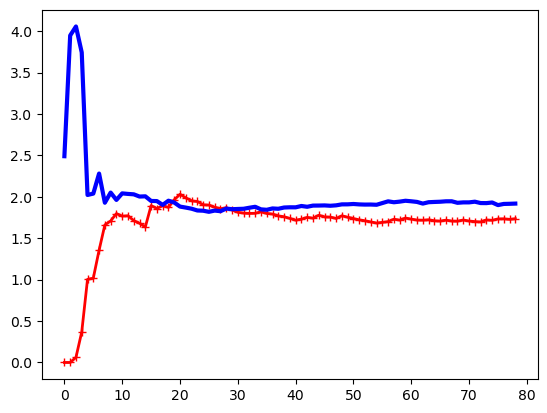

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
